In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
dfx=pd.read_csv('xdata.csv')
dfy=pd.read_csv('ydata.csv')

In [48]:
X=dfx.values
Y=dfy.values

X=X[:,1:]
Y=Y[:,1:].reshape((-1,))

print(X)
print(X.shape)
print(Y.shape)

[[ 3.516279    3.71975047]
 [ 4.60649561  3.41437943]
 [ 4.67701056  3.04724443]
 [ 4.15772454  3.13867678]
 [ 3.15443087  3.61985805]
 [ 3.41751854  4.59164128]
 [ 1.61124605  3.39835595]
 [ 4.28808719  4.04396943]
 [ 3.19607968  4.95114323]
 [ 1.6258394   4.90239967]
 [ 2.82894521  3.91445026]
 [ 2.28966729  5.06896877]
 [ 2.89206152  3.66529487]
 [ 2.33634919  4.77256166]
 [ 3.67027475  3.79730296]
 [ 2.30717865  4.73262822]
 [ 3.15130599  3.43648588]
 [ 4.14502484  2.94851846]
 [ 2.17253471  3.6488889 ]
 [ 3.39390371  4.13447274]
 [ 1.59644351  4.43875703]
 [ 3.38348549  4.02119623]
 [ 5.08330979  4.03477733]
 [ 1.21644435  4.31174386]
 [ 4.15939179  2.54939222]
 [ 2.2392529   4.33673035]
 [ 2.99918423  5.63946256]
 [ 3.10384641  3.0156258 ]
 [ 2.47612428  4.12508079]
 [ 3.2447355   2.49239435]
 [ 2.03739207  5.03815425]
 [ 0.60211258  5.29511732]
 [ 4.96947578  3.37368252]
 [ 3.21264629  3.83263367]
 [ 4.37032895  4.13833792]
 [ 3.69323485  3.24528272]
 [ 3.09839038  3.35192483]
 

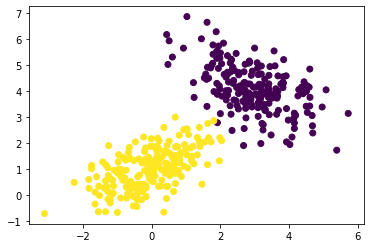

In [49]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

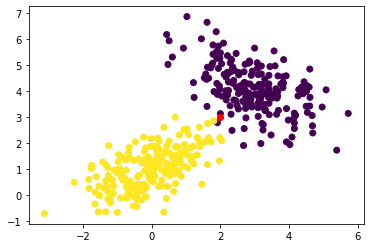

In [50]:
query_x=np.array([2,3])
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x[0],query_x[1],color='red')
plt.show()

In [19]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals=[]
    
    m=X.shape[0]
    
    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    vals=sorted(vals)
    vals=vals[:k]
        
    vals=np.array(vals)
    
   # print(vals)
    
    new_vals=np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

In [20]:
knn(X,Y,query_x)

(array([0., 1.]), array([3, 2]))


0.0

#MNIST DataSets

In [21]:
df=pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [22]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [23]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Create Numpy Array
data=df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [25]:
X=data[:,1:]
Y=data[:,0]

print(X.shape,Y.shape)

(42000, 784) (42000,)


In [26]:
split=int(0.8*X.shape[0])
print(split)

33600


In [27]:
X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


In [30]:
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

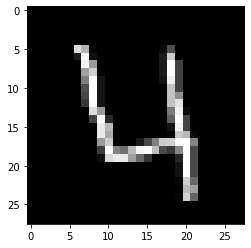

4


In [31]:
drawImg(X_train[3])
print(Y_train[3])

#Making Prediction

In [47]:
pred=knn(X_train,Y_train,X_test[89])
print(pred)

(array([0., 6.]), array([4, 1]))
0.0


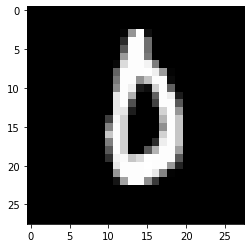

0


In [46]:
drawImg(X_test[89])
print(Y_test[89])